**任务:**

1、采用Kmeans算法实现2D数据自动聚类，预测V1=80,V2=60数据类别；

2、计算预测准确率，完成结果矫正

3、采用KNN、Meanshift算法，重复步骤1-2

数据：data.csv

In [5]:
# 加载数据，图形化展示
import pandas  as pd
mport pandas as pd

data = pd.read_csv("data.csv")
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [7]:
#define X and y
X = data.drop(['labels'],axis=1)
y = data.loc[:,'labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

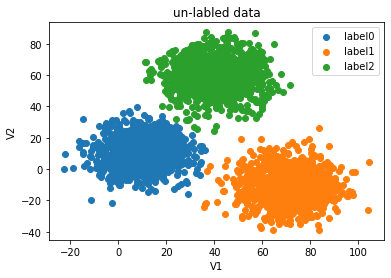

In [10]:

from matplotlib import pyplot as plt
fig1 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2), ('label0', 'label1', 'label2'))
plt.show()

In [11]:
print(X.shape)

(3000, 2)


In [12]:
# 构建model
from  sklearn.cluster import KMeans
KM = KMeans(n_clusters = 3, random_state = 0)
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

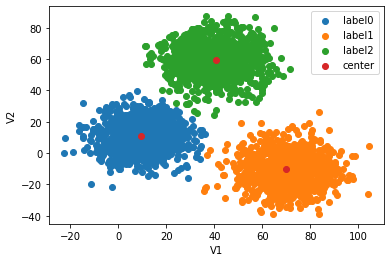

In [17]:
# 获得中心点的坐标， 
centers = KM.cluster_centers_
# 绘画中心点
fig2 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

labelCenter = plt.scatter(centers[:,0],centers[:,1])

plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2, labelCenter), ('label0', 'label1', 'label2', 'center'))
plt.show()


In [18]:
# 进行预测
test_data = [80, 60]
y_predict_test = KM.predict([test_data])
print(y_predict_test)


[2]


In [19]:
# 获取准确率
y_predict = KM.predict(X)
print(pd.value_counts(y_predict), pd.value_counts(y))

2    1149
0     952
1     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)

print(accuracy)


0.38366666666666666
